# Section 2 : Machine Learning Project

### 데이터
- https://www.kaggle.com/jessemostipak/hotel-booking-demand
- Hotel booking demand - From the paper: hotel booking demand datasets
- https://www.sciencedirect.com/science/article/pii/S2352340918315191

### Detailed Column Descriptions

- 'hotel' : Hotel (H1 = Resort Hotel , H2 = City Hotel)
- 'is_canceled' : 예약취소 ( 0 = 예약 취소 , 1 = 숙박)
- 'lead_time' : 예약일 부터 도착일 사이 경과 일수
- 'arrival_date_year' : 도착 년
- 'arrival_date_month' : 도착 월
- 'arrival_date_week_number' : 도착 일자의 주 (n / 52주)
- 'arrival_date_day_of_month' : 도착 일
- 'stays_in_weekend_nights' : 투숙객 주말 숙박 또는 예약일수 (토요일, 일요일)
- 'stays_in_week_nights' : 투숙객 주중 숙박일수(월~금)
- 'adults' : 성인 수
- 'children' : 어린이 수
- 'babies' : 유아 수
- 'meal' : 식사 예약 - 정의되지 않음(Undefined), 식사 없음(SC), 조식(BB), 조식+ 1식사(HB), 일 3식(FB)
- 'country' : 출신 국가 (ISO 3155–3:2013 포멧 사용)
- 'market_segment' : 시장 분화 - 여행사(TA), 관광사업자(TO)
- 'distribution_channel' : 예약 경로 - 여행사(TA), 관광사업자(TO)
- 'is_repeated_guest' : 처음오는 손님 (0) , 반복 방문 손님 (1)
- 'previous_cancellations' : 현재 예약 전에 다른 고객이 취소한 수
- 'previous_bookings_not_canceled' : 현재 예약 전에 취소되지 않고 정상적으로 숙박한 수
- 'reserved_room_type' : 예약 객실 타입 코드. (익명성 위해 코드 제공) (A~P)
- 'assigned_room_type' : 예약에 할당된 객실 타입 코드 (실제 예약과 다를 수 있음, 초과예약 or 요청) (A~L)
- 'booking_changes' : 예약 후 체크인/취소 시점까지의 예약 변경 횟수
- 'deposit_type' : 디파짓 타입 (No Deposit, Non Refund – 총 비용 만큼, Refundable – 총 비용보다 적은)
- 'agent' : 예약한 여행사의 ID
- 'company' : 예약 업체/ 지불해야할 업체의 ID
- 'days_in_waiting_list' : 예약 확정되기 까지 대기목록에 있었던 일 수
- 'customer_type' : 예약 유형 (Contract : 계약(제휴) / Group : 10개 이상 예약 / Transient : 단기투숙 / Transient-party : 10개 이하 단체)
- 'adr' : 일일 평균 숙박 요금
- 'required_car_parking_spaces' : 고객이 필요로 하는 주차 공간 수
- 'total_of_special_requests' : 고객의 특별 요청 건수 (트윈베드, 고층 등)
- 'reservation_status' : 마지막 예약 상태 (Canceled/ Check-Out/ No-Show)
- 'reservation_status_date' : 마지막 상태 날짜 ('reservation_status'와 함께 checked-out 날짜를 알수 있음)


---
## 데이터 선정 이유 및 문제 정의
 - 휴가철이면 항상 숙소가 부족하여 적게는 1개월, 많게는 몇 개월 전부터 예약 전쟁을 치룬다. 하지만 각종 매체를 통해 취소나 노쇼에 대한 문제가 심심치않게 들려온다. 
- 내가 만약 호텔을 경하는 입장이라면, 이러한 취소가 예상되는 객실을 알아내여 예약 대기 or Overbooking 을 통해 객실을 비어두는 손해를 최소화 하고자 할 것이다. 
- Machine Learning을 통해 이러한 문제를 해결해 보고자 한다.
- 어떤 손님이 예약을 했을때, 예약을 유지할지 취소할지 알 수있다면 Overbooking을 통해 손해를 줄일 수 있다.

---
## 데이터 로드
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
## 데이터 불러오기 (분할과, 컬럼 중 y를 'sign_up_deposit' 로 바꿔줌)
df= pd.read_csv('C:/python/codestates/data/hotel_bookings.csv')

---
## 데이터 살펴보기
---

In [3]:
df

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [4]:
## 데이터 profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---
## 특징
- country : high cardinality: 177 
- reservation_status_date : high cardinality: 926
- agent : 16340 (13.7%) missing values
- company : 112593 (94.3%) missing values
- babies : highly skewed (γ1 = 24.64654483)	
- previous_cancellations : highly skewed (γ1 = 24.45804872)	
- previous_bookings_not_canceled : highly skewed (γ1 = 23.53979995)
---

In [4]:
## 데이터 shape
df.shape

(119390, 32)

In [5]:
##  데이터 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
## 결측치 확인
df.isnull().sum()

# 결측치 : children (4) , country (5) , agent (16340) , company (112593)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
## 컬럼별 데이터 확인하기

## 컬럼 네임 가져오기
columns = df.columns

def dfinfo(i):
    print('>>>>> column <<<<<', columns[i],sep='\n')
    print('---------------------------------------------------------')
    print('>>>>> value_counts <<<<<' , df[columns[i]].value_counts(),sep='\n')
    print('---------------------------------------------------------')
    print(df[columns[i]])
    print('---------------------------------------------------------')
    print('>>>>> isnull.sum <<<<<',df[columns[i]].isnull().sum(),sep='\n')

In [8]:
## 컬럼 데이터 확인 (0~31 로 모든 컬럼 확인)
dfinfo(31)

>>>>> column <<<<<
reservation_status_date
---------------------------------------------------------
>>>>> value_counts <<<<<
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-26       1
2015-04-07       1
2015-03-12       1
2015-04-25       1
2015-02-09       1
Name: reservation_status_date, Length: 926, dtype: int64
---------------------------------------------------------
0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object
---------------------------------------------------------
>>>>> isnull.sum <<<<<
0


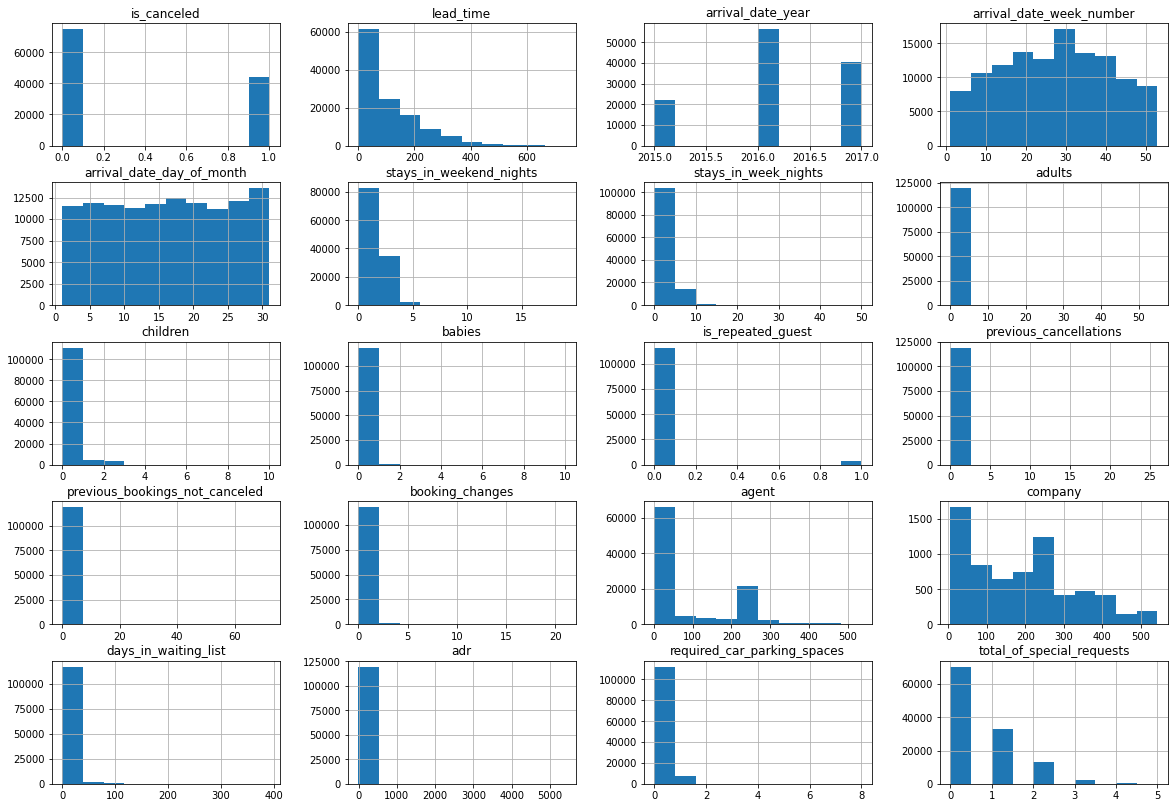

In [9]:
## Numeric data 한눈에 보기
df.hist(figsize=(20,14))
plt.show()

---
## 데이터 탐색 결과

- arrival_date_month - 월을 숫자 처리
- children - float -> int 로 바꿔줌
- children, country, agent, company 컬럼의 결측치 처리
---

---
## 상관관계 보기
---

In [10]:
## 상관관계 보기  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
df.corr(method='pearson')

is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   
previous_bookings_not_canceled    -0.057358  -0.073548           0.029218   
booking_changes                   -0.144381   0.000149           0.030872   
agent                             -0.083114  -0.069741           0.063457   
company                           -0.020642   0.151464           0.259095   
days_in_waiting_list               0.054186   0.170084          -0.056497   
adr                                0.047557  -0.063077           0.197580   
required_car_parking_spaces       -0.195498  -0.116451          -0.013684   
total_of_special_requests         -0.234658  -0.095712           0.108531   

                                arrival_date_week_number  \
is_canceled                                     0.008148   
lead_time                                       0.126871   
arrival_date_year                              -0.540561   
arrival_date_week_number                        1.000000   
arrival_date_day_of_month                       0.066809   
stays_in_weekend_nights                         0.018208   
stays_in_week_nights                            0.015558   
adults                                          0.025909   
children                                        0.005518   
babies                                          0.010395   
is_repeated_guest                              -0.030131   
previous_cancellations                          0.035501   
previous_bookings_not_canceled                 -0.020904   
booking_changes                                 0.005508   
agent                                          -0.031201   
company                                        -0.076760   
days_in_waiting_list                            0.022933   
adr                                             0.075791   
required_car_parking_spaces                     0.001920   
total_of_special_requests                       0.026149   

                                arrival_date_day_of_month  \
is_canceled                                     -0.006130   
lead_time                                        0.002268   
arrival_date_year                               -0.000221   
arrival_date_week_number                         0.066809   
arrival_date_day_of_month                        1.000000   
stays_in_weekend_nights                         -0.016354   
stays_in_week_nights                            -0.028174   
adults                                          -0.001566   
children                                         0.014544   
babies                                          -0.000230   
is_repeated_guest                               -0.006145   
previous_cancellations                          -0.027011   
previous_bookings_not_canceled                  -0.000300   
booking_changes                                  0.010613   
agent                                            0.001487   
company                                          0.044858   
days_in_waiting_list                             0.022728   
adr                                              0.0302

In [11]:
## 상관관계 보기 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
df.corr(method='pearson')['is_canceled'].abs().sort_values(ascending = False) 

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

---
## 결측치 제거
---

In [12]:
dfinfo(10)

>>>>> column <<<<<
children
---------------------------------------------------------
>>>>> value_counts <<<<<
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64
---------------------------------------------------------
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64
---------------------------------------------------------
>>>>> isnull.sum <<<<<
4


In [13]:
dfinfo(13)

>>>>> column <<<<<
country
---------------------------------------------------------
>>>>> value_counts <<<<<
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
LCA        1
PLW        1
MRT        1
SDN        1
SLE        1
Name: country, Length: 177, dtype: int64
---------------------------------------------------------
0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object
---------------------------------------------------------
>>>>> isnull.sum <<<<<
488


In [14]:
dfinfo(23)

>>>>> column <<<<<
agent
---------------------------------------------------------
>>>>> value_counts <<<<<
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
304.0        1
431.0        1
278.0        1
450.0        1
114.0        1
Name: agent, Length: 333, dtype: int64
---------------------------------------------------------
0           NaN
1           NaN
2           NaN
3         304.0
4         240.0
          ...  
119385    394.0
119386      9.0
119387      9.0
119388     89.0
119389      9.0
Name: agent, Length: 119390, dtype: float64
---------------------------------------------------------
>>>>> isnull.sum <<<<<
16340


In [15]:
dfinfo(24)

>>>>> column <<<<<
company
---------------------------------------------------------
>>>>> value_counts <<<<<
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
273.0      1
415.0      1
352.0      1
253.0      1
497.0      1
Name: company, Length: 352, dtype: int64
---------------------------------------------------------
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64
---------------------------------------------------------
>>>>> isnull.sum <<<<<
112593


In [16]:
## agent, company  행 삭제 - 결측치가 매우 많고, cancel과 상관이 없는 데이터 이므로 삭제
df = df.drop(['agent', 'company'], axis =1)

In [17]:
## 결측치 수가 매우 작아 삭제
df[['children', 'country']].isnull().sum()

children      4
country     488
dtype: int64

In [18]:
## 결측치 제거
df = df.dropna(axis=0)

In [19]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

---
## children 칼럼 int
---

In [20]:
## children - float -> int 로 바꿔줌
df['children'] = df['children'].astype('int')

---
## 데이터 랭글러 및 EDA
---

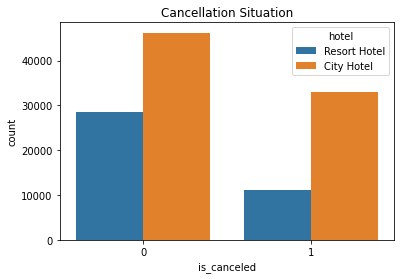

In [24]:
## 호텔 종류에 따른 숙박 / 취소 비율
sns.countplot(x='is_canceled', hue = 'hotel', data= df)
plt.title('Cancellation Situation')
plt.show()

In [126]:
df['hotel'].value_counts()

City Hotel      76298
Resort Hotel    37168
Name: hotel, dtype: int64

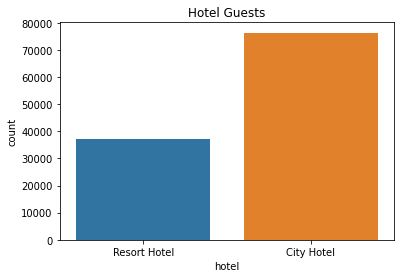

In [132]:
sns.countplot(x='hotel', data= df)
plt.title('Hotel Guests')
plt.show()

In [26]:
## 고객 유형별 취소 비율

## 투숙 타입별 예약 취소 건수
group_customer_type = df.groupby('customer_type').sum().is_canceled
chart_customer_type = pd.DataFrame(group_customer_type)
chart_customer_type['per'] = group_customer_type.values/group_customer_type.values.sum()*100
chart_customer_type

is_canceled        per
customer_type                          
Contract                1262   2.858243
Group                     58   0.131361
Transient              36460  82.576495
Transient-Party         6373  14.433900

In [27]:
chart_customer_type['per'].round(2)

customer_type
Contract            2.86
Group               0.13
Transient          82.58
Transient-Party    14.43
Name: per, dtype: float64

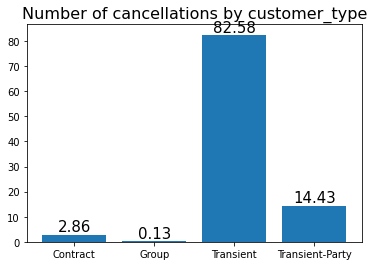

In [28]:
## 손님 유형별 취소
#group_customer_type.plot(kind='bar');
plt.title("Number of cancellations by customer_type",fontsize= 16)

x = chart_customer_type.index
y = chart_customer_type['per'].round(2)
plt.bar(x,y)

for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15,
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()

손님 유형별 취소 비율
- Transient : 82.5%
- Transient-Party : 14.4%
- 두 유형만 해도 전체 예약 취소의 97%에 달한다. (단기투숙객, 10개 객실 이하의 단체 단기 투숙객)
- 따라서, 위 두 유형을 집중적으로 조명해 본다.
---

In [29]:
## Transient, Transient-Party 만 선택한다.
df1 = df[df['customer_type'] == 'Transient'] 
df2 = df[df['customer_type'] == 'Transient-Party']
df = pd.concat([df1, df2])

In [30]:
df['is_canceled'].value_counts()

0    71419
1    42833
Name: is_canceled, dtype: int64

In [31]:
cancel_rate = df['is_canceled'].value_counts() / df['is_canceled'].value_counts().sum()
cancel_rate

0    0.625101
1    0.374899
Name: is_canceled, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


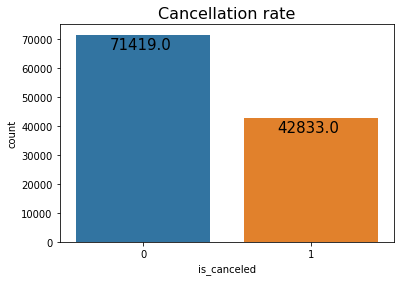

In [32]:
## 취소자 수
ax = sns.countplot(df['is_canceled']);

plt.title("Cancellation rate",fontsize= 16)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()-5000), fontsize= 15)
        
## (0 : 투숙 , 1 : 취소)

전체 단기 투숙객 중 37%가 취소된다. (42833 / 11452)

---

#### 이상치 확인

In [33]:
## 이상치 확인 (데이터프레임)
df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest',
    'previous_cancellations','previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 
    'required_car_parking_spaces', 'total_of_special_requests']].describe().T

count        mean         std   min   25%  \
lead_time                       114252.0  103.174675  106.074662  0.00  18.0   
stays_in_weekend_nights         114252.0    0.910120    0.978665  0.00   0.0   
stays_in_week_nights            114252.0    2.456185    1.840612  0.00   1.0   
adults                          114252.0    1.853701    0.491978  0.00   2.0   
children                        114252.0    0.105775    0.400727  0.00   0.0   
babies                          114252.0    0.007947    0.097710  0.00   0.0   
is_repeated_guest               114252.0    0.031614    0.174972  0.00   0.0   
previous_cancellations          114252.0    0.082458    0.858727  0.00   0.0   
previous_bookings_not_canceled  114252.0    0.133897    1.509623  0.00   0.0   
booking_changes                 114252.0    0.224416    0.658794  0.00   0.0   
days_in_waiting_list            114252.0    2.422260   17.972797  0.00   0.0   
adr                             114252.0  102.608584   50.892165 -6.38  70.0   
required_car_parking_spaces     114252.0    0.062774    0.245854  0.00   0.0   
total_of_special_requests       114252.0    0.565723    0.788577  0.00   0.0   

                                 50%    75%     max  
lead_time                       69.0  158.0   737.0  
stays_in_weekend_nights          1.0    2.0    16.0  
stays_in_week_nights             2.0    3.0    41.0  
adults                           2.0    2.0     4.0  
children                         0.0    0.0     3.0  
babies                           0.0    0.0    10.0  
is_repeated_guest                0.0    0.0     1.0  
previous_cancellations           0.0    0.0    26.0  
previous_bookings_not_canceled   0.0    0.0    72.0  
booking_changes                  0.0    0.0    21.0  
days_in_waiting_list             0.0    0.0   391.0  
adr                             95.0  126.0  5400.0  
required_car_parking_spaces      0.0    0.0     8.0  
total_of_special_requests        0.0    1.0     5.0

---
#### 정보 누수 데이터 삭제

target 컬럼이 취소와 관련되기 때문에, 데이터 생성 과정에서 취소화 관련된 컬럼들을 제외시킨다.
 - booking_changes : 예약 후 체크인/취소시점까지의 예약 변경 횟수
    * 취소 시점이 존재하므로 취소 시점 유추 가능
 - reservation_status : 마지막 예약 상태 (Canceled/ Check-Out/ No-Show)
     * 마지막 상태에서 Canceled 로 취소 유추 가능
 - reservation_status_date : 마지막 상태 날짜 ('reservation_status'와 함께 checked-out 날짜를 알수 있음)
     * 마지막 상태의 날짜가 만약 없다면, 이는 취소를 유추하는 방법이 될 수 있음

In [34]:
df = df.drop(['booking_changes', 'reservation_status', 'reservation_status_date' ], axis=1)

___
#### 이상치 처리

In [35]:
## 이상치 구하기 함수 (iqr) - 이상치의 index 넘버 반환
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25,75])  # 넘파이 값을 퍼센트로 표시해주는 함수
    
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    
    return np.where((data > upper_bound)|(data < lower_bound))

In [36]:
## numeric 컬럼 이상치 갯수 함수
for i in columns:
    try:
        print(i, " : " ,df[i].iloc[outliers_iqr(df[i])].count())  ## 이상치 갯수
    except:
        pass

is_canceled  :  0
lead_time  :  2997
arrival_date_year  :  0
arrival_date_week_number  :  0
arrival_date_day_of_month  :  0
stays_in_weekend_nights  :  246
stays_in_week_nights  :  2702
adults  :  28758
children  :  8389
babies  :  877
is_repeated_guest  :  3612
previous_cancellations  :  5510
previous_bookings_not_canceled  :  3213
days_in_waiting_list  :  3691
adr  :  3856
required_car_parking_spaces  :  7125
total_of_special_requests  :  2708


In [37]:
## adults, children, babies 도합 0이 된다는 것은 숙박객이 0 이므로 제외한다. ( 164 row 삭제)
df = df[df['adults'] + df['children'] + df['babies'] > 0 ]

In [38]:
## stays_in_week_nights, stays_in_weekend_nights의 합이 0 이 된다는 것은 숙박객이 0 이므로 제외한다. ( 619 row 삭제)
df = df[df['stays_in_week_nights'] + df['stays_in_weekend_nights'] > 0 ]

In [39]:
## boxplot 함수
def my_boxplot(i):
    plt.figure(figsize=(8,1))
    sns.boxplot(x= columns[i] , data = df);

<ipython-input-39-05f4c9312c50>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8,1))


<Figure size 576x72 with 0 Axes>

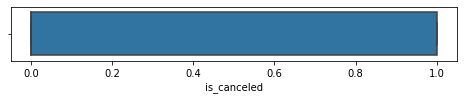

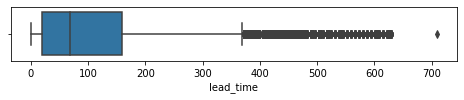

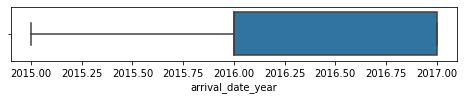

<Figure size 576x72 with 0 Axes>

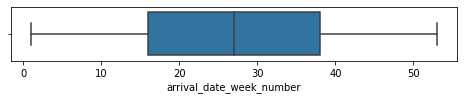

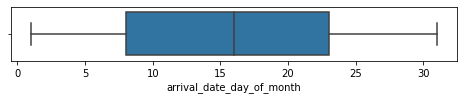

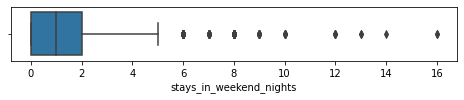

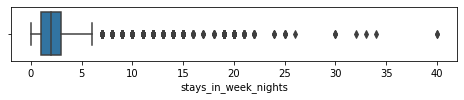

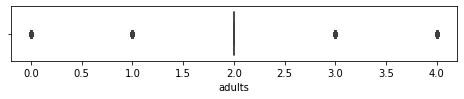

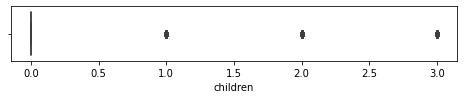

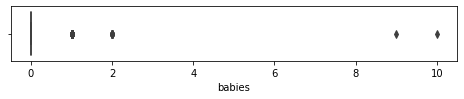

<Figure size 576x72 with 0 Axes>

<Figure size 576x72 with 0 Axes>

<Figure size 576x72 with 0 Axes>

<Figure size 576x72 with 0 Axes>

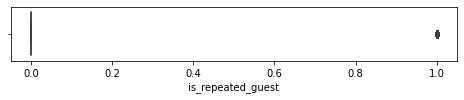

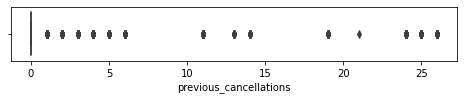

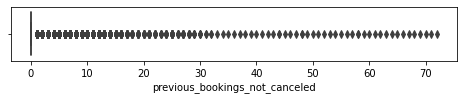

<Figure size 576x72 with 0 Axes>

<Figure size 576x72 with 0 Axes>

<Figure size 576x72 with 0 Axes>

<Figure size 576x72 with 0 Axes>

<Figure size 576x72 with 0 Axes>

<Figure size 576x72 with 0 Axes>

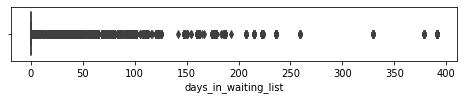

<Figure size 576x72 with 0 Axes>

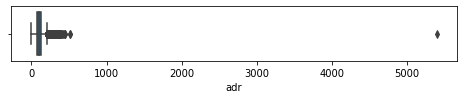

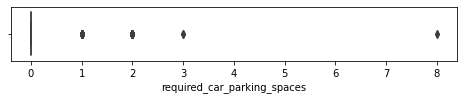

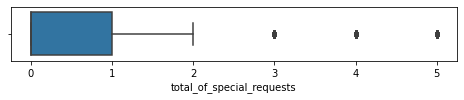

<Figure size 576x72 with 0 Axes>

In [40]:
## 모든 컬럼에 대해 boxplot 확인 (확인 후 raw 처리)
for i in range(0,31):
    try :
        my_boxplot(i)
    except:
        pass

In [41]:
## adr 의 가장 큰 이상치 제거
df = df[df['adr'] != 5400]

>>>>> column <<<<<
adr
---------------------------------------------------------
>>>>> value_counts <<<<<
62.00     3047
75.00     2684
90.00     2400
65.00     2382
80.00     1840
          ... 
134.42       1
97.93        1
210.03       1
120.51       1
29.06        1
Name: adr, Length: 8641, dtype: int64
---------------------------------------------------------
2          75.00
3          75.00
4          98.00
5          98.00
6         107.00
           ...  
119347    195.33
119348    195.33
119352    195.33
119353    195.33
119354    195.33
Name: adr, Length: 113468, dtype: float64
---------------------------------------------------------
>>>>> isnull.sum <<<<<
0


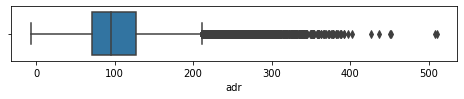

In [42]:
i = 27

dfinfo(i)
my_boxplot(i)      

In [43]:
## babies 가 8 명 이상인 컬럼 제거
df = df[df['babies'] < 8]

>>>>> column <<<<<
babies
---------------------------------------------------------
>>>>> value_counts <<<<<
0    112596
1       856
2        14
Name: babies, dtype: int64
---------------------------------------------------------
2         0
3         0
4         0
5         0
6         0
         ..
119347    0
119348    0
119352    0
119353    0
119354    0
Name: babies, Length: 113466, dtype: int64
---------------------------------------------------------
>>>>> isnull.sum <<<<<
0


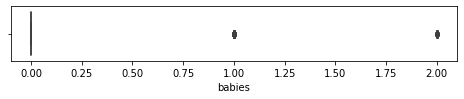

In [44]:
i = 11

dfinfo(i)
my_boxplot(i)

---
#### 숙박일 통합 컬럼 만들기

In [45]:
## arrival_date_month - 월을 숫자 처리
def month_change(j):
    month_dic = {'January' : '01' , 'February' : '02' , 'March' : '03', 'April' : '04' , 'May' : '05' , 'June' : '06' ,
                'July' : '07' , 'August' : '08' , 'September' : '09' , 'October' : '10' , 'November' : '11' , 'December' : '12'}
    return month_dic[j]

df['arrival_date_month'] = df['arrival_date_month'].apply(month_change)

In [46]:
## arrival_date_day_of_month - 일을 숫자 처리
def day_change(j):
    day_dic = {1:'01' , 2 : '02' , 3 : '03', 4 : '04' , 5 : '05' , 6 : '06', 7 : '07' , 8 : '08' , 9 : '09' , 10 : '10', 
               11:'11',12:'12',13:'13',14:'14', 15:'15', 16:'16',17:'17', 18:'18', 19:'19', 20:'20', 21:'21', 22:'22', 
               23:'23', 24:'24', 25:'25', 26:'26', 27:'27', 28:'28', 29:'29', 30:'30', 31:'31'}
    return day_dic[j]

df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].apply(day_change)

In [47]:
## 년, 월, 일 을 합쳐 날짜 컬럼을 만들기
df['arrival_date'] = df['arrival_date_year'].map(str) + '-'+ df['arrival_date_month'].map(str) +'-'+ df['arrival_date_day_of_month'].map(str)

In [48]:
## 'arrival_date_month' 를 int로 바꿔줌
df['arrival_date_month'] = df['arrival_date_month'].astype('int')

___
#### 자녀 유무 컬럼 만들기

In [49]:
## 자녀의 유무 컬럼 만들기

def children_binary(value):
    if value >= 1 : 
        return "have childern"
    else:
        return "no childern"
    
df['have_children'] = (df['children']|df['babies']).apply(children_binary)

___
#### 총 방문자 수 컬럼 만들기

In [50]:
## 어른,어린이,아기 를 합쳐 총 방문객 수 만들기
df['guests'] = df['adults'] + df['children'] + df['babies']

---
#### 총 숙박 일수 컬럼 만들기

In [51]:
## 주중, 주말 숙박일을 더해 총 숙박 일 수 만들기
df['stays_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

---
호텔 타입에 따른 월별 가격

In [55]:
## 호텔 타입에 따른 월별 가격
resort_price = df[df['hotel'] == 'Resort Hotel'].groupby('arrival_date').mean()['adr']
city_price = df[df['hotel'] == 'City Hotel'].groupby('arrival_date').mean()['adr']

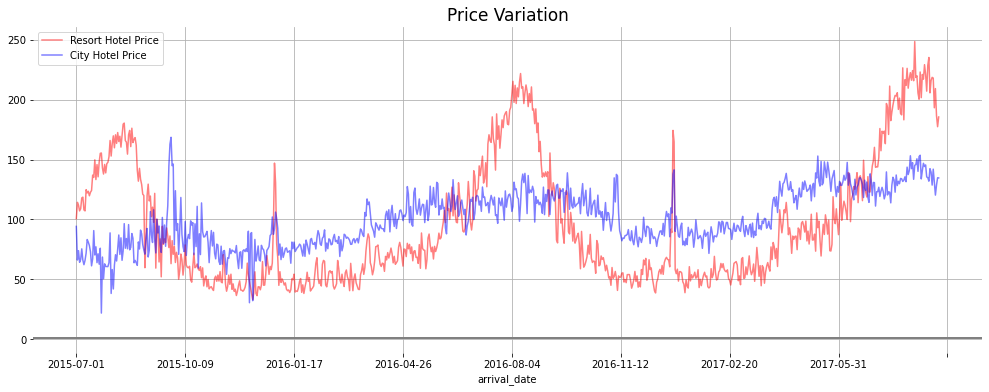

In [92]:
fig, ax1 = plt.subplots()
ax1 = resort_price.plot(figsize=(17,6), color='red',alpha = 0.5, label = 'Resort Hotel Price')
ax2 = city_price.plot(figsize=(17,6), color='blue',alpha = 0.5, label = 'City Hotel Price')
ax1.legend()

plt.title("Price Variation",fontsize=17) ## 타이틀 설정  

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)

---
#### 시즌별 숙박비용 비교

In [93]:
## 일별 평균 가격 / 일별 숙박객 수
month_price = df.groupby('arrival_date').mean()['adr']
guests = df.groupby('arrival_date').sum()['guests']

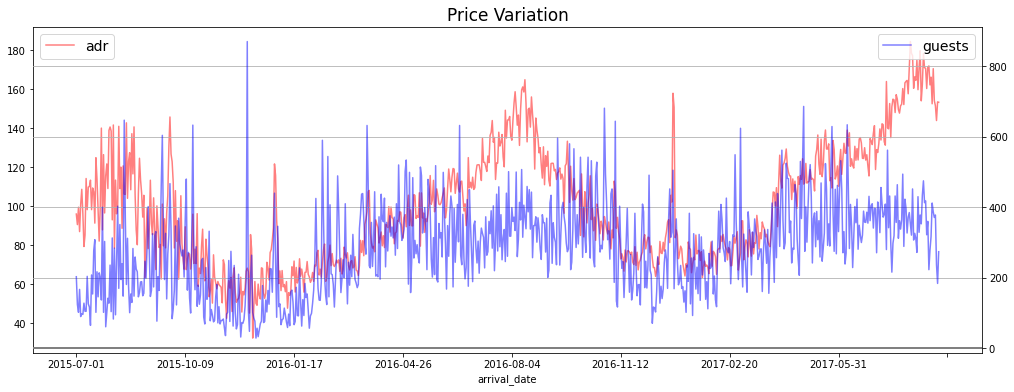

In [94]:
fig, ax1 = plt.subplots()
ax1 = month_price.plot(figsize=(17,6), color='red',alpha = 0.5)
plt.legend(fontsize=14)   # 범례 표시

ax2 = ax1.twinx()
ax2 = guests.plot(figsize=(17,6), color='blue',alpha = 0.5)
plt.title("Price Variation",fontsize=17) ## 타이틀 설정  

plt.legend(fontsize=14)   # 범례 표시

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)


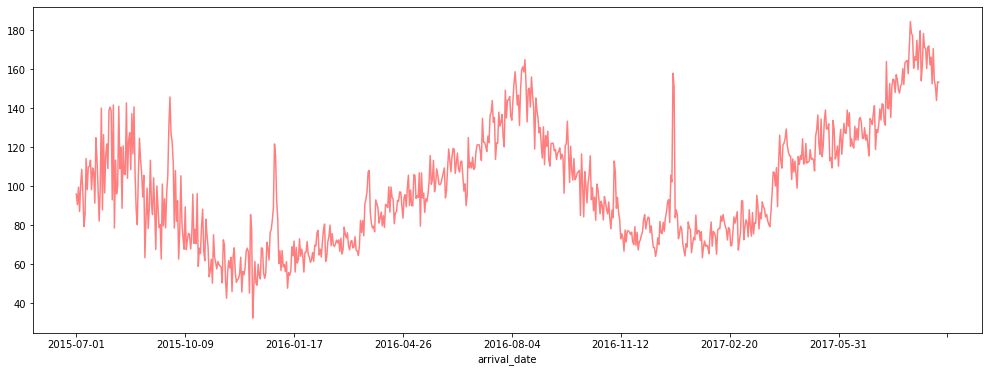

In [95]:
## 일별 평균 숙박 비용 추세
month_price.plot(figsize=(17,6), color='red',alpha = 0.5);

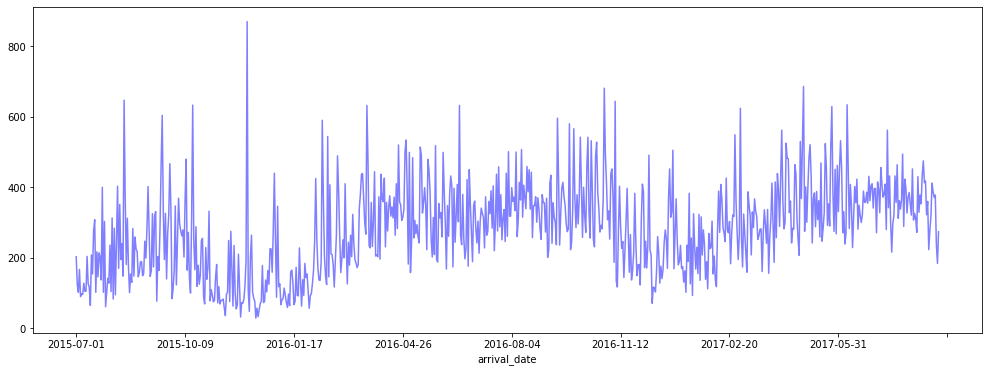

In [96]:
## 일별 평균 방문객 수
guests.plot(figsize=(17,6), color='blue',alpha = 0.5);

In [97]:
year_month = df['arrival_date_year'].map(str) + '-'+ df['arrival_date_month'].map(str)

## 월별 가격 평균
year_month_price = df.groupby(year_month).mean()['adr']

## 월별 방문 게스트
year_month_guess = df.groupby(year_month).sum()['guests']

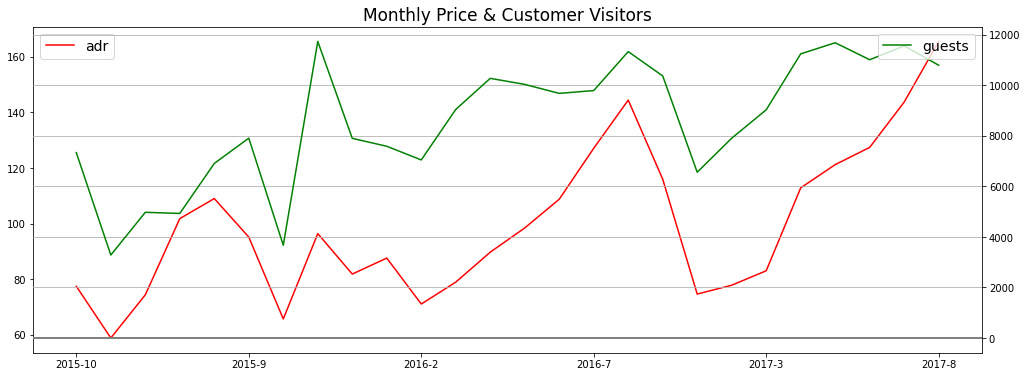

In [98]:
fig, ax1 = plt.subplots()
ax1 = year_month_price.plot(figsize=(17,6), color='red')
ax1.legend(fontsize=14, loc = 'upper left')   # 범례 표시

ax2 = ax1.twinx()
ax2 = year_month_guess.plot(figsize=(17,6), color='green')
ax2.legend(fontsize=14, loc = 'upper right')   # 범례 표시

plt.title("Monthly Price & Customer Visitors",fontsize=17) ## 타이틀 설정  

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.gca().spines['bottom'].set_visible(False) #아래 테두리 제거

plt.axhline(y=1, color='grey', linewidth=2) # 회색 가로줄
plt.grid(True)


---
#### 기간별 취소 건수

In [99]:
## 월별 취소객 수
canceled_count = df.groupby(year_month).sum()['is_canceled']

## 월별 투숙객 수
guests_countl = df.groupby(year_month)['is_canceled'].count() - canceled_count

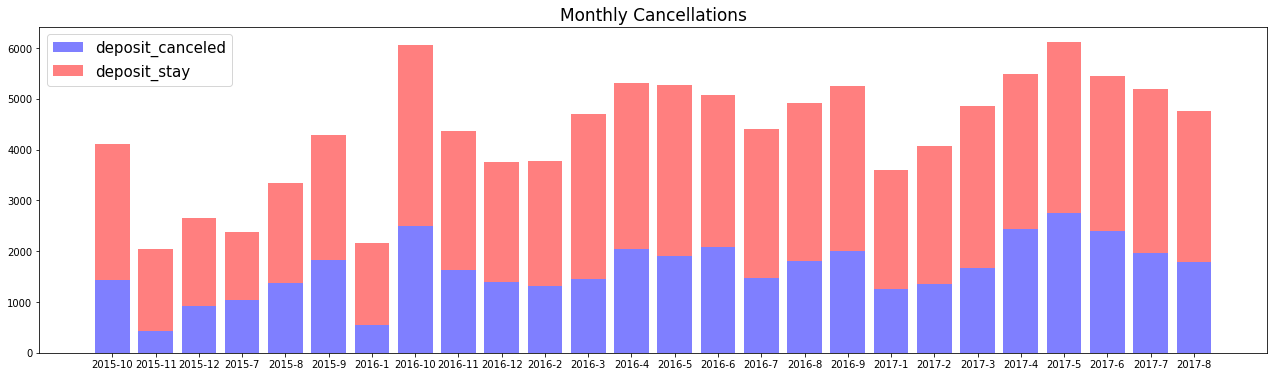

In [100]:
plt.figure(figsize=(22,6)) ## 캔버스 생성

x = canceled_count
y = guests_countl

p1 = plt.bar(x.index, x , color='b',alpha = 0.5)
p2 = plt.bar(y.index, y , color='r',alpha = 0.5, bottom=x)
plt.title("Monthly Cancellations",fontsize=17) ## 타이틀 설정  
plt.legend((p1[0], p2[0]), ('deposit_canceled', 'deposit_stay'), fontsize=15);

---
#### 투숙객들의 출신 국가

In [101]:
country_guests = df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_guests.columns =['country', 'gusets count']
country_guests

country  gusets count
0       PRT         19887
1       FRA          8211
2       GBR          8197
3       ESP          6174
4       DEU          5921
..      ...           ...
159     AIA             1
160     SDN             1
161     NPL             1
162     MDG             1
163     ZMB             1

[164 rows x 2 columns]

In [102]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [103]:
basemap = folium.Map()
guests_map = px.choropleth(country_guests, locations = country_guests['country'],
                           color = country_guests['gusets count'], hover_name = country_guests['country'])
guests_map.show()

In [104]:
## 대부분의 투숙객은 유럽국가 출신이다.

---
#### deposit에 따른 취소 비율

In [105]:
deposit_canceled = df.groupby('deposit_type').sum()['is_canceled']  # 취소 
deposit_total = df.groupby('deposit_type')['is_canceled'].count()  # 전체
deposit_stay = deposit_total - deposit_canceled # 숙박

In [106]:
deposit_total

deposit_type
No Deposit    99286
Non Refund    14028
Refundable      152
Name: is_canceled, dtype: int64

In [107]:
deposit_stay

deposit_type
No Deposit    70461
Non Refund       93
Refundable      118
Name: is_canceled, dtype: int64

In [108]:
deposit_canceled

deposit_type
No Deposit    28825
Non Refund    13935
Refundable       34
Name: is_canceled, dtype: int64

In [149]:
a1 = pd.DataFrame(deposit_total)
a2 = pd.DataFrame(deposit_stay)
a3 = pd.DataFrame(deposit_canceled)
a4 = pd.concat([a1, a2, a3], axis=1)
a4.columns = ['deposit_total' ,  'deposit_stay' , 'deposit_canceled']
a4

deposit_total  deposit_stay  deposit_canceled
deposit_type                                               
No Deposit            99286         70461             28825
Non Refund            14028            93             13935
Refundable              152           118                34

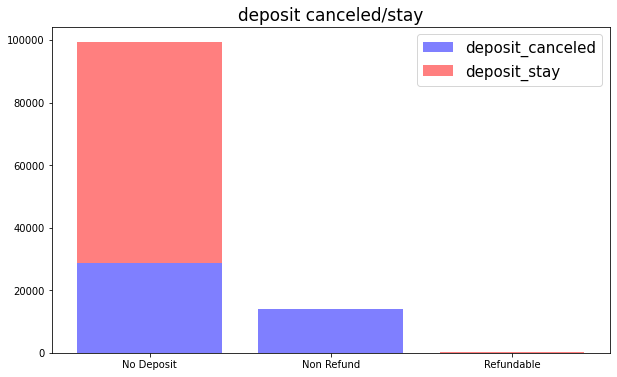

In [109]:
plt.figure(figsize=(10,6)) ## 캔버스 생성

x = deposit_canceled
y = deposit_stay

p1 = plt.bar(x.index, x , color='b',alpha = 0.5)
p2 = plt.bar(y.index, y , color='r',alpha = 0.5, bottom=x)
plt.title("deposit canceled/stay",fontsize=17) ## 타이틀 설정  
plt.legend((p1[0], p2[0]), ('deposit_canceled', 'deposit_stay'), fontsize=15);

In [110]:
# 특이하게 non refund 에서도 취소가 압도적으로 많음 => 취소를 할 사람은 금액에 얽매이지 않고 취소를 결정 함

---
#### 예약일 부터 숙박일 까지의 기간(lead_time)에 따른 취소

In [111]:
leadtime_canceled = df.groupby('lead_time').sum()['is_canceled']  # 취소 
leadtime_total = df.groupby('lead_time')['is_canceled'].count()  # 전체
leadtime_stay = leadtime_total - leadtime_canceled # 숙박

In [153]:
leadtime_total

lead_time
0      5704
1      3197
2      1944
3      1724
4      1615
       ... 
615      17
622      17
626      30
629      17
709       1
Name: is_canceled, Length: 467, dtype: int64

In [154]:
leadtime_stay

lead_time
0      5303
1      2891
2      1736
3      1553
4      1446
       ... 
615       0
622       0
626       0
629       0
709       1
Name: is_canceled, Length: 467, dtype: int64

In [155]:
leadtime_canceled

lead_time
0      401
1      306
2      208
3      171
4      169
      ... 
615     17
622     17
626     30
629     17
709      0
Name: is_canceled, Length: 467, dtype: int64

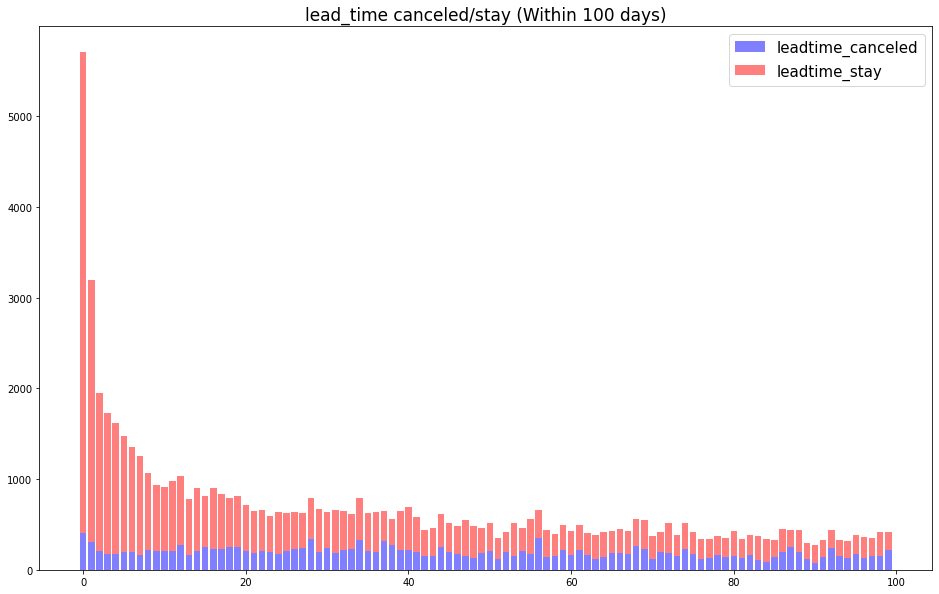

In [115]:
plt.figure(figsize=(16,10)) ## 캔버스 생성

x = leadtime_canceled.head(100)
y = leadtime_stay.head(100)

p1 = plt.bar(x.index, x , color='b',alpha = 0.5)
p2 = plt.bar(y.index, y , color='r',alpha = 0.5, bottom=x)
plt.title("lead_time canceled/stay (Within 100 days)",fontsize=17) ## 타이틀 설정  
plt.legend((p1[0], p2[0]), ('leadtime_canceled', 'leadtime_stay'), fontsize=15);

---
## 데이터 분석
---

In [116]:
df = df.reset_index(drop=True)

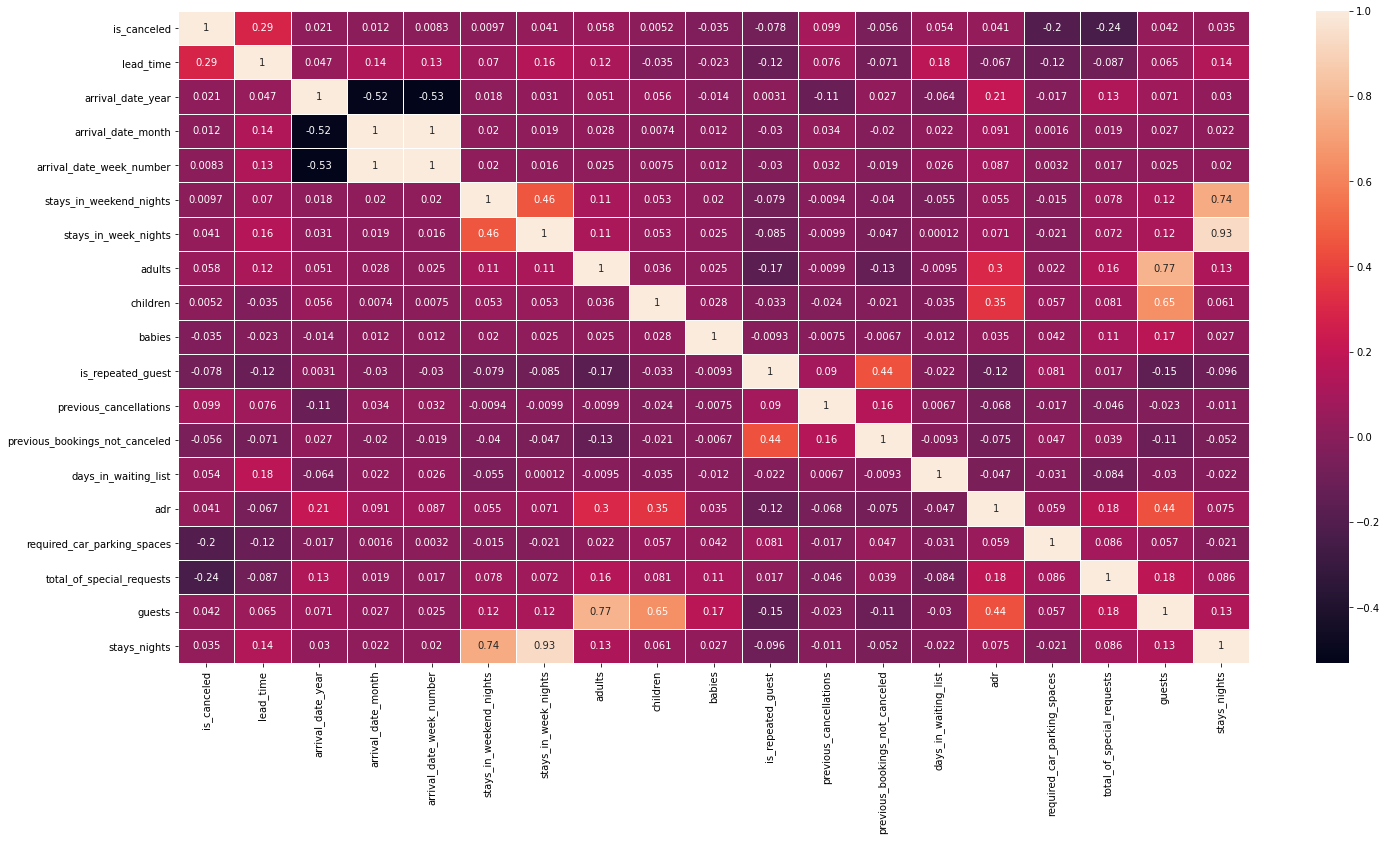

In [117]:
plt.figure(figsize = (24, 12))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [118]:
correlation = df.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.286546
total_of_special_requests         0.237649
required_car_parking_spaces       0.199070
previous_cancellations            0.099277
is_repeated_guest                 0.077867
adults                            0.058362
previous_bookings_not_canceled    0.055968
days_in_waiting_list              0.053915
guests                            0.042065
adr                               0.041342
stays_in_week_nights              0.041143
babies                            0.034897
stays_nights                      0.034797
arrival_date_year                 0.021295
arrival_date_month                0.011556
stays_in_weekend_nights           0.009719
arrival_date_week_number          0.008324
children                          0.005221
Name: is_canceled, dtype: float64

---
#### 추가적으로 크게 상관이 없는 컬럼들을 삭제 해준다.

In [119]:
remove_col = ['previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type']

df.drop(remove_col, axis = 1, inplace = True)

"""
previous_cancellations : 숙박 이전의 데이터는 호텔데이터 특성상 언제든 변할수 있기 때문에 삭제한다.
previous_bookings_not_canceled : 숙박 이전의 데이터는 호텔데이터 특성상 언제든 변할수 있기 때문에 삭제한다.
assigned_room_type : 실제 예약과 다를 수 있기 때문엔 삭제한다.
""";

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113466 entries, 0 to 113465
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        113466 non-null  object 
 1   is_canceled                  113466 non-null  int64  
 2   lead_time                    113466 non-null  int64  
 3   arrival_date_year            113466 non-null  int64  
 4   arrival_date_month           113466 non-null  int32  
 5   arrival_date_week_number     113466 non-null  int64  
 6   arrival_date_day_of_month    113466 non-null  object 
 7   stays_in_weekend_nights      113466 non-null  int64  
 8   stays_in_week_nights         113466 non-null  int64  
 9   adults                       113466 non-null  int64  
 10  children                     113466 non-null  int32  
 11  babies                       113466 non-null  int64  
 12  meal                         113466 non-null  object 
 13 

---
### 기준모델 생성

In [120]:
## 기준모델 생성
## train, test 로 나눈 후, train 을 다시 train 과 val 로 나눔
from sklearn.model_selection import train_test_split
target = 'is_canceled'
train, test = train_test_split(df, train_size= 0.80, test_size= 0.20, stratify= df[target], random_state= 2)
train, val = train_test_split(train, train_size= 0.80, test_size= 0.20, stratify= train[target], random_state= 2)

train.shape, val.shape, test.shape

((72617, 28), (18155, 28), (22694, 28))

In [121]:
## 훈련/검증/테스트 데이터를 특성과 타겟으로 분리

features = train.drop(columns=[target]).columns

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [122]:
# 클래스 분포 (class_weight 를 줄지 고민해 봐야함)
train[target].value_counts(normalize=True)

0    0.622843
1    0.377157
Name: is_canceled, dtype: float64

In [157]:
## val 정확도
from sklearn.metrics import f1_score, accuracy_score

majority_class = train[target].mode()[0]
y_pred_val = [majority_class] * len(val)

print('최빈 클래스: ', majority_class)
print("validation 정확도: ", accuracy_score(y_val, y_pred_val))
print("기준모델의 정확도가 0.62이므로, 그 이상이면 모데이 잘 만들어 진 것이다.")


최빈 클래스:  0
validation 정확도:  0.6228587166069953
기준모델의 정확도가 0.62이므로, 그 이상이면 모데이 잘 만들어 진 것이다.


---
## 로지스틱 회귀(logistic Regression)

In [159]:
from sklearn.tree import DecisionTreeClassifier,  DecisionTreeRegressor
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 파이프 라인 사용
pipe_lg = make_pipeline(
    OrdinalEncoder(),   
    StandardScaler(),
    LogisticRegression(max_iter = 1000 ,random_state=42)
)   

# 예측
pipe_lg.fit(X_train, y_train)

y_pred = pipe_lg.predict(X_val)

conf = confusion_matrix(y_val, y_pred)
clf_report = classification_report(y_val, y_pred)

print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

print('훈련 정확도(train_accuracy): ', pipe_lg.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_lg.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred))

y_pred_proba = pipe_lg. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))  ## ROC 커브 면적

Confusion Matrix : 
[[10534   774]
 [ 3292  3555]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84     11308
           1       0.82      0.52      0.64      6847

    accuracy                           0.78     18155
   macro avg       0.79      0.73      0.74     18155
weighted avg       0.78      0.78      0.76     18155

훈련 정확도(train_accuracy):  0.7791288541250672
검증 정확도(val_accuracy):  0.776039658496282
validation f1_score:  0.6361846814602721
AUC score:  0.8184437977815066


AUC score:  0.8184437977815066


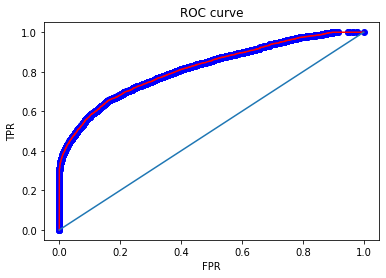

In [87]:
## ROC curve (1에 가까울 수록 학습이 잘됐다.)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt. scatter(fpr, tpr, color= 'blue')
plt. plot(fpr, tpr, color= 'red')
plt. plot([0,1],[0,1])
plt. title('ROC curve')
plt. xlabel('FPR')
plt. ylabel('TPR')
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))  ## ROC 커브 면적

idx: 2385 , threshold: 0.4070822296931258


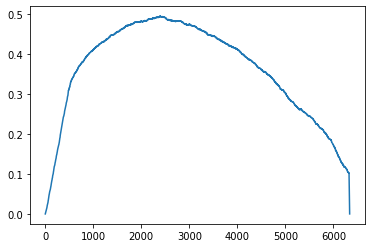

In [88]:
# 최적 threshold 
optimal_idx = np. argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)
plt. plot(tpr- fpr);

# 임계값이 1이면 positive를 예측을 할 수 없게 되고 0에 가까워질수록 positive라고 예측할 확률이 높아진다.

# 임계값을 아래 threshold 값으로 정했을 때가 최적

hotel                         -0.025963
lead_time                      0.400315
arrival_date_year             -0.004043
arrival_date_month             0.360257
arrival_date_week_number      -0.364858
arrival_date_day_of_month     -0.008937
stays_in_weekend_nights        0.032020
stays_in_week_nights           0.042144
adults                         0.020059
children                       0.007975
babies                        -0.017384
meal                          -0.070028
country                       -0.123147
market_segment                -0.430986
distribution_channel          -0.034797
is_repeated_guest              0.025183
reserved_room_type            -0.000457
deposit_type                  -1.582642
days_in_waiting_list          -0.039426
customer_type                 -0.430376
adr                            0.225467
required_car_parking_spaces   -2.032519
total_of_special_requests     -0.519306
arrival_date                  -0.034861
have_children                  0.034043


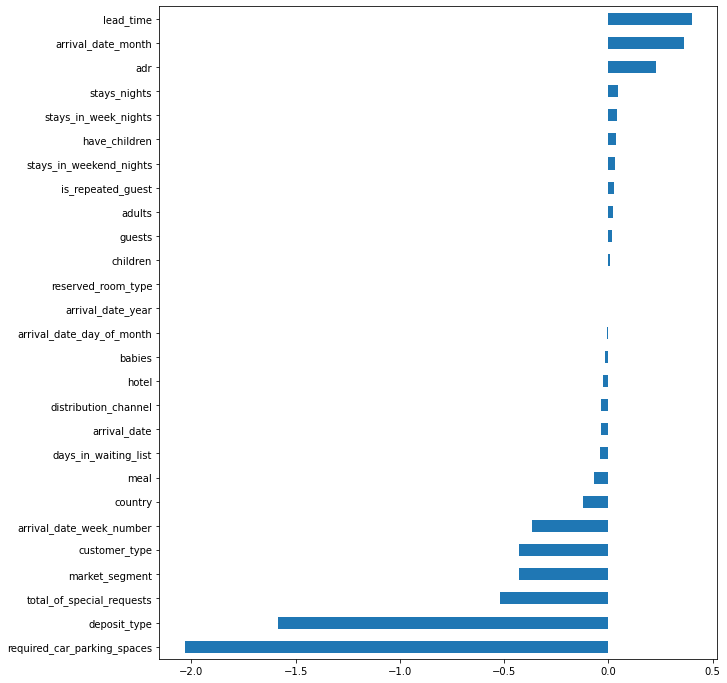

In [89]:
## feature importances
model_dt = pipe_lg. named_steps['logisticregression']
coefficients = pd. Series(model_dt. coef_[0], X_train. columns) ## 어떤 특성이 중요한지 한눈에 확인 가능
print(coefficients)

plt.figure(figsize = (10, 12))
coefficients. sort_values(). plot. barh();

---
- 하이퍼파라미터 튜닝

In [93]:
# 하이퍼파라미터 적용
pipe_lg = make_pipeline(
    OrdinalEncoder(),   
    StandardScaler(),
    LogisticRegression(max_iter = 1000 ,random_state=42,
                      penalty = 'l2', C = 0.01)
)   

# 예측
pipe_lg.fit(X_train, y_train)

y_pred_lg = pipe_lg.predict(X_val)

conf_lg = confusion_matrix(y_val, y_pred_lg)
clf_report_lg = classification_report(y_val, y_pred_lg)

print(f"Confusion Matrix : \n{conf_lg}")
print(f"Classification Report : \n{clf_report_lg}")

print('훈련 정확도(train_accuracy): ', pipe_lg.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_lg.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_lg))

y_pred_proba_lg = pipe_lg. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_lg))  ## ROC 커브 면적

Confusion Matrix : 
[[10562   746]
 [ 3316  3531]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.93      0.84     11308
           1       0.83      0.52      0.63      6847

    accuracy                           0.78     18155
   macro avg       0.79      0.72      0.74     18155
weighted avg       0.79      0.78      0.76     18155

훈련 정확도(train_accuracy):  0.7786881859619649
검증 정확도(val_accuracy):  0.7762599834756265
validation f1_score:  0.6348435814455231
AUC score:  0.8182716331165565


In [94]:
# 큰 차이가 없음

---
### 결정나무 (Dicision Tree)

In [160]:
# 파이프 라인 사용
pipe_dt = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(),                    
    DecisionTreeClassifier(random_state= 1, criterion= 'entropy')
)   

# 예측
pipe_dt.fit(X_train, y_train)

y_pred = pipe_dt.predict(X_val)

conf = confusion_matrix(y_val, y_pred)
clf_report = classification_report(y_val, y_pred)

print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

print('훈련 정확도(train_accuracy): ', pipe_dt.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_dt.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred))

y_pred_proba = pipe_dt. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

Confusion Matrix : 
[[9789 1519]
 [1488 5359]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11308
           1       0.78      0.78      0.78      6847

    accuracy                           0.83     18155
   macro avg       0.82      0.82      0.82     18155
weighted avg       0.83      0.83      0.83     18155

훈련 정확도(train_accuracy):  0.9947532946830632
검증 정확도(val_accuracy):  0.8343706967777472
validation f1_score:  0.780910746812386
AUC score:  0.8267639619602108


Text(0.5, 1.0, 'Confusion matrix, n = 18155')

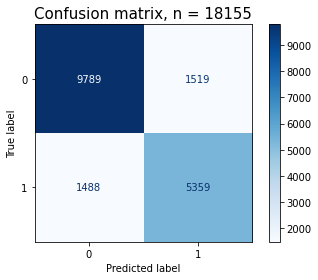

In [163]:
fig, ax = plt. subplots()
pcm = plot_confusion_matrix(pipe_dt, X_val, y_val, cmap= plt. cm. Blues, ax= ax);
plt. title(f'Confusion matrix, n = {len(y_val)}', fontsize= 15)
## 이전과 확연히 달라짐 => false 만 예측하다 true 도 예측함

AUC score:  0.8267639619602108


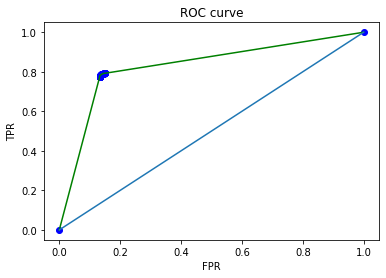

In [161]:
## ROC curve (1에 가까울 수록 학습이 잘됐다.)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt. scatter(fpr, tpr, color= 'blue')
plt. plot(fpr, tpr, color= 'green')
plt. title('ROC curve')
plt. xlabel('FPR')
plt. ylabel('TPR')
plt. plot([0,1],[0,1])
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))  ## ROC 커브 면적

idx: 21 , threshold: 0.5074626865671642


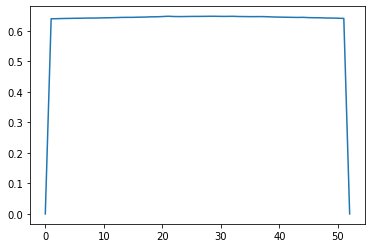

In [97]:
# 최적 threshold 
optimal_idx = np. argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)
plt. plot(tpr- fpr);

# 임계값을 0.2727으로 정했을 때가 최적

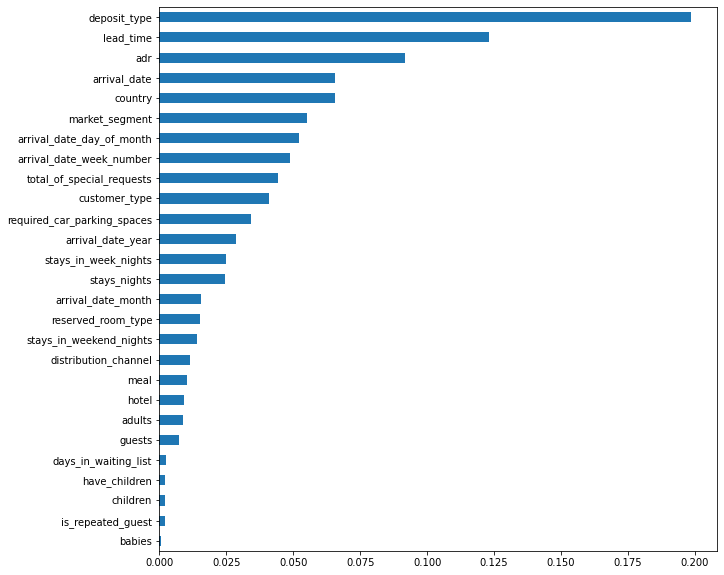

In [98]:
## feature_importances 확인
model_dt = pipe_dt. named_steps['decisiontreeclassifier']

importances = pd. Series(model_dt. feature_importances_, features)
plt. figure(figsize= (10,10))
importances. sort_values(). plot. barh();

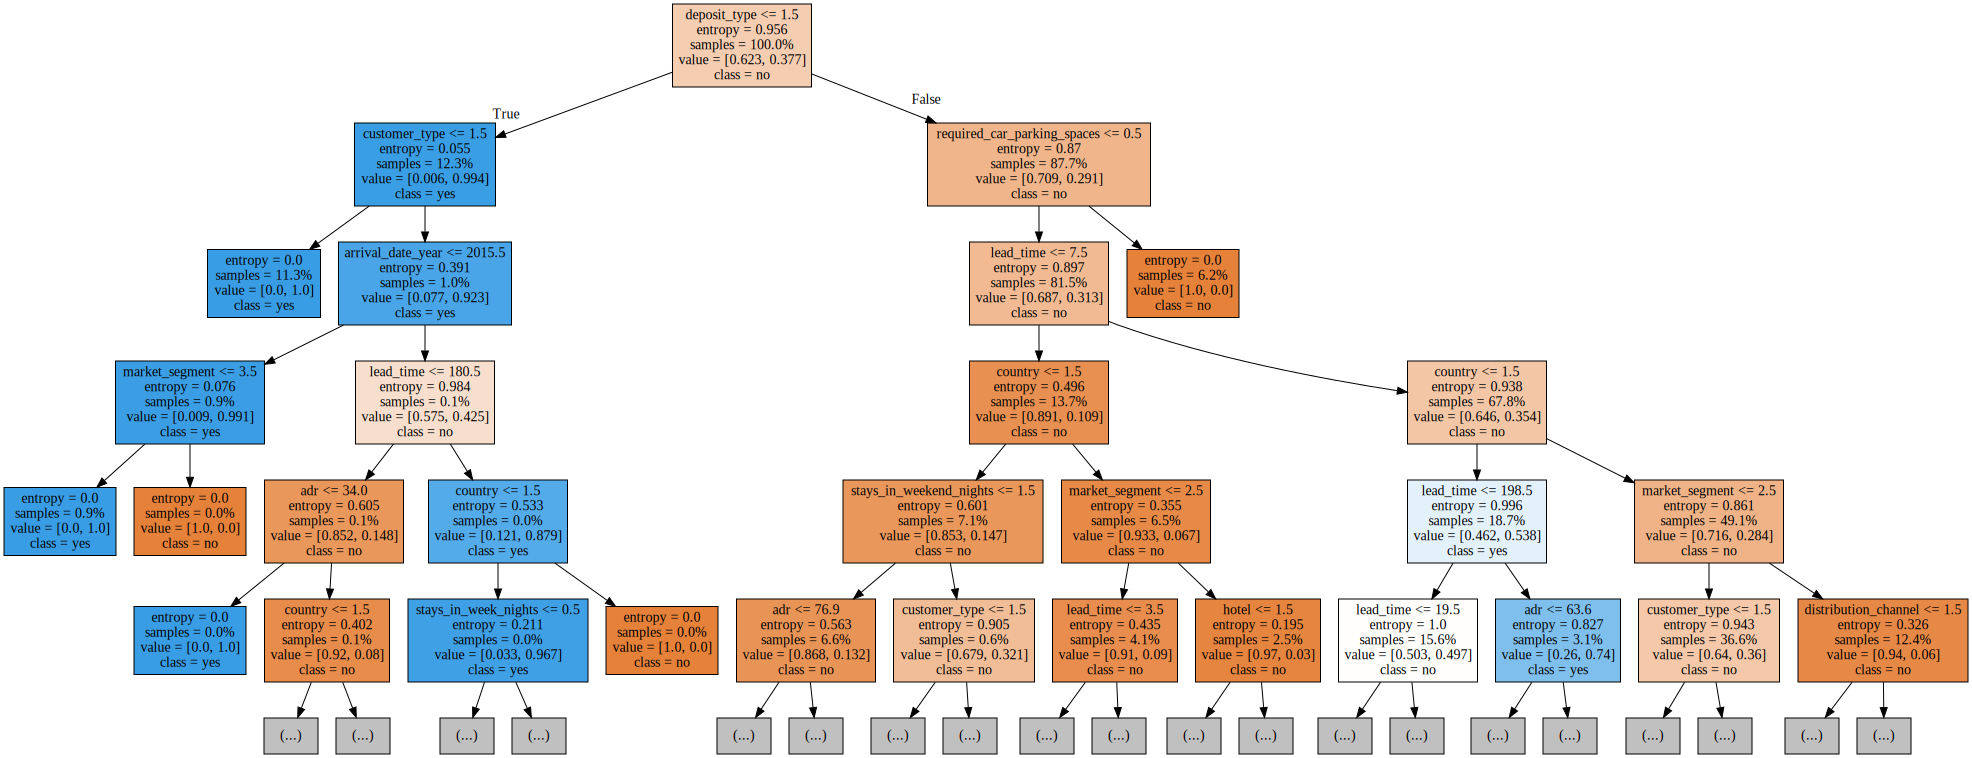

In [100]:
import graphviz
from sklearn.tree import export_graphviz
model_dt = pipe_dt. named_steps['decisiontreeclassifier']
enc = pipe_dt. named_steps['ordinalencoder']
encoded_columns = enc. transform(X_val). columns
dot_data = export_graphviz(model_dt
                           , max_depth= 5
                           , feature_names= encoded_columns
                           , class_names= ['no', 'yes']
                           , filled= True
                           , proportion= True )
display(graphviz. Source(dot_data))                  

---
- 하이퍼파라미터 튜닝

In [144]:
# 하이퍼파라미터 적용
pipe_dt = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(),                    
    DecisionTreeClassifier(random_state= 1, 
                           criterion= 'entropy',
                          max_depth = 19,
                          max_features = 0.9708770779562554,
                          min_samples_leaf = 14,
                          min_samples_split=4)
)   

# 예측
pipe_dt.fit(X_train, y_train)

y_pred_dt = pipe_dt.predict(X_val)

conf_dt = confusion_matrix(y_val, y_pred_dt)
clf_report_dt = classification_report(y_val, y_pred_dt)

print(f"Confusion Matrix : \n{conf_dt}")
print(f"Classification Report : \n{clf_report_dt}")

print('훈련 정확도(train_accuracy): ', pipe_dt.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_dt.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_dt))

y_pred_proba_dt = pipe_dt. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_dt))

Confusion Matrix : 
[[10100  1208]
 [ 1696  5151]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     11308
           1       0.81      0.75      0.78      6847

    accuracy                           0.84     18155
   macro avg       0.83      0.82      0.83     18155
weighted avg       0.84      0.84      0.84     18155

훈련 정확도(train_accuracy):  0.8770260407342634
검증 정확도(val_accuracy):  0.8400440649958689
validation f1_score:  0.7800999545661063
AUC score:  0.9147332927818602


In [ ]:
# 과적합이 어느정도 해결 되었고, 검증 정확도가 조금 햐상 되었다. AUC 도 많이 항샹 되었다.

In [104]:
# test 
pipe_dt = make_pipeline(
    OrdinalEncoder(),  
    SimpleImputer(),                    
    DecisionTreeClassifier(random_state= 1, 
                           criterion= 'entropy',
                          max_depth = 19,
                          max_features = 0.9708770779562554,
                          min_samples_leaf = 14,
                          min_samples_split=4)
)   

# 예측
pipe_dt.fit(X_test, y_test)
y_pred_dt = pipe_dt.predict(X_test)
clf_report_dt = classification_report(y_test, y_pred_dt)


print(f"Classification Report : \n{clf_report_dt}")
print('검증 정확도(val_accuracy): ', pipe_dt.score(X_test, y_test))
print("validation f1_score: ", f1_score(y_test, y_pred_dt))
y_pred_proba_dt = pipe_dt. predict_proba(X_test)[:, - 1]
print('AUC score: ', roc_auc_score(y_test, y_pred_proba_dt))  ## ROC 커브 면적

Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     14135
           1       0.86      0.79      0.82      8559

    accuracy                           0.87     22694
   macro avg       0.87      0.86      0.86     22694
weighted avg       0.87      0.87      0.87     22694

검증 정확도(val_accuracy):  0.8724773067771217
validation f1_score:  0.8241584639688905
AUC score:  0.9518606589860688


---
### 랜덤포레스트 (Random Forest)

In [105]:
# 파이프 라인 사용
pipe_rf = make_pipeline(
    OrdinalEncoder(),   
    SimpleImputer(),                    
    RandomForestClassifier(n_jobs=-1,  random_state=10, oob_score=True)
)   

# 예측
pipe_rf.fit(X_train, y_train)

y_pred = pipe_rf.predict(X_val)

conf = confusion_matrix(y_val, y_pred)
clf_report = classification_report(y_val, y_pred)

print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

print('훈련 정확도(train_accuracy): ', pipe_rf.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_rf.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred))

y_pred_proba = pipe_rf. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

Confusion Matrix : 
[[10457   851]
 [ 1410  5437]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11308
           1       0.86      0.79      0.83      6847

    accuracy                           0.88     18155
   macro avg       0.87      0.86      0.87     18155
weighted avg       0.87      0.88      0.87     18155

훈련 정확도(train_accuracy):  0.9947395238029663
검증 정확도(val_accuracy):  0.8754613054255026
validation f1_score:  0.8278644842025124
AUC score:  0.9461145586522005


AUC score:  0.9461145586522005


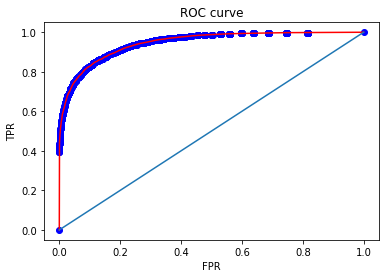

In [106]:
## ROC curve (1에 가까울 수록 학습이 잘됐다.)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt. scatter(fpr, tpr, color= 'blue')
plt. plot(fpr, tpr, color= 'red')
plt. plot([0,1],[0,1])
plt. title('ROC curve')
plt. xlabel('FPR')
plt. ylabel('TPR')
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))  ## ROC 커브 면적

idx: 402 , threshold: 0.4056726190476191


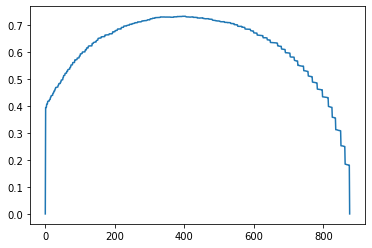

In [107]:
# 최적 threshold 
optimal_idx = np. argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)
plt. plot(tpr- fpr);

# 임계값이 1이면 positive를 예측을 할 수 없게 되고 0에 가까워질수록 positive라고 예측할 확률이 높아진다.

# 임계값을 아래 threshold 값으로 정했을 때가 최적

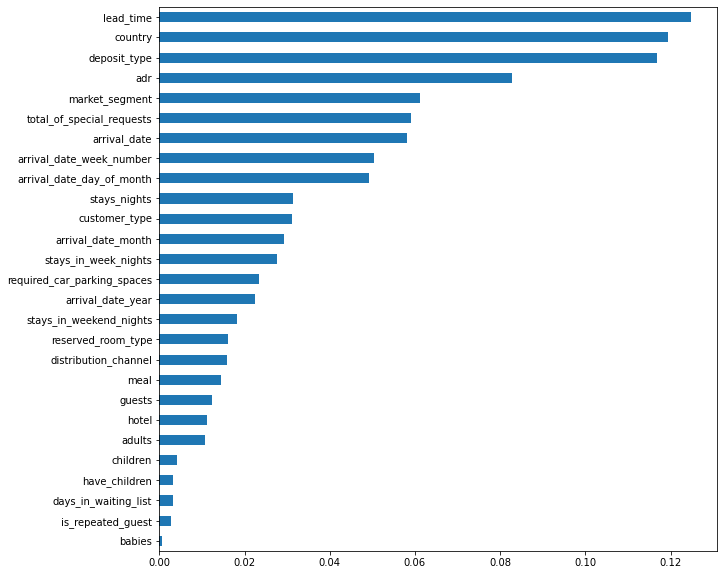

In [108]:
## feature_importances 확인
model_dt = pipe_rf. named_steps['randomforestclassifier']

importances = pd. Series(model_dt. feature_importances_, features)
plt. figure(figsize= (10,10))
importances. sort_values(). plot. barh();

Text(0.5, 1.0, 'Confusion matrix, n = 18155')

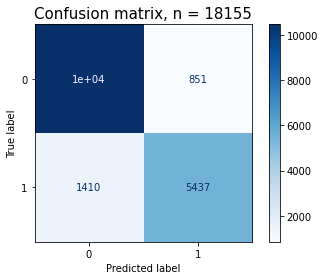

In [109]:
fig, ax = plt. subplots()
pcm = plot_confusion_matrix(pipe_rf, X_val, y_val, cmap= plt. cm. Blues, ax= ax);
plt. title(f'Confusion matrix, n = {len(y_val)}', fontsize= 15)
## 이전과 확연히 달라짐 => false 만 예측하다 true 도 예측함

---
- 하이퍼파라미터 튜닝

In [147]:
# 하이퍼파라미터 적용
pipe_rf = make_pipeline(
    OrdinalEncoder(),   
    SimpleImputer(),                    
    RandomForestClassifier(n_jobs=-1,  random_state=10, oob_score=True,
                          max_depth= 55,
                          max_features= 0.591472916347301,
                          min_samples_leaf=1,  ## 과적합일 경우 높임
                          min_samples_split=4,
                          n_estimators=463)
)   

# 예측
pipe_rf.fit(X_train, y_train)

y_pred_rf = pipe_rf.predict(X_val)

conf_rf = confusion_matrix(y_val, y_pred_rf)
clf_report_rf = classification_report(y_val, y_pred_rf)

print(f"Confusion Matrix : \n{conf_rf}")
print(f"Classification Report : \n{clf_report_rf}")

print('훈련 정확도(train_accuracy): ', pipe_rf.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_rf.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_rf))

y_pred_proba_rf = pipe_rf. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_rf))

Confusion Matrix : 
[[10393   915]
 [ 1350  5497]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     11308
           1       0.86      0.80      0.83      6847

    accuracy                           0.88     18155
   macro avg       0.87      0.86      0.87     18155
weighted avg       0.87      0.88      0.87     18155

훈련 정확도(train_accuracy):  0.9933899775534655
검증 정확도(val_accuracy):  0.8752409804461581
validation f1_score:  0.829172637453805
AUC score:  0.9470568792789635


In [112]:
# 과적합이 크게 차이가 없음

---
### XG부스트 (XG Boost)

In [164]:
# 파이프 라인 사용
pipe_xg = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    XGBClassifier(n_jobs=-1, random_state=1)
)   

# 예측
pipe_xg.fit(X_train, y_train)

y_pred = pipe_xg.predict(X_val)

conf = confusion_matrix(y_val, y_pred)
clf_report = classification_report(y_val, y_pred)

print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

print('훈련 정확도(train_accuracy): ', pipe_xg.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_xg.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred))

y_pred_proba = pipe_xg. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix : 
[[10248  1060]
 [ 1553  5294]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     11308
           1       0.83      0.77      0.80      6847

    accuracy                           0.86     18155
   macro avg       0.85      0.84      0.84     18155
weighted avg       0.86      0.86      0.85     18155

훈련 정확도(train_accuracy):  0.8852610270322376
검증 정확도(val_accuracy):  0.8560727072431837
validation f1_score:  0.8020604499659117
AUC score:  0.9339669854042078


Text(0.5, 1.0, 'Confusion matrix, n = 18155')

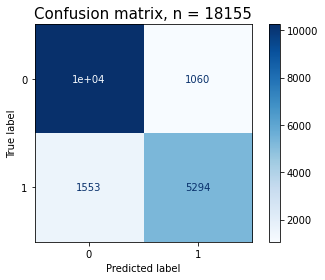

In [166]:
fig, ax = plt. subplots()
pcm = plot_confusion_matrix(pipe_xg, X_val, y_val, cmap= plt. cm. Blues, ax= ax);
plt. title(f'Confusion matrix, n = {len(y_val)}', fontsize= 15)
## 이전과 확연히 달라짐 => false 만 예측하다 true 도 예측함

AUC score:  0.9339669854042078


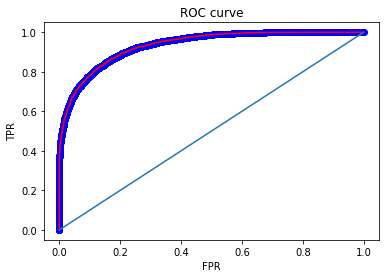

In [119]:
## ROC curve (1에 가까울 수록 학습이 잘됐다.)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt. scatter(fpr, tpr, color= 'blue')
plt. plot(fpr, tpr, color= 'red')
plt. plot([0,1],[0,1])
plt. title('ROC curve')
plt. xlabel('FPR')
plt. ylabel('TPR')
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))  ## ROC 커브 면적

idx: 2852 , threshold: 0.34903517


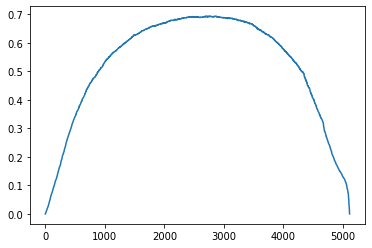

In [120]:
# 최적 threshold 
optimal_idx = np. argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)
plt. plot(tpr- fpr);

# 임계값이 1이면 positive를 예측을 할 수 없게 되고 0에 가까워질수록 positive라고 예측할 확률이 높아진다.

# 임계값을 아래 threshold 값으로 정했을 때가 최적

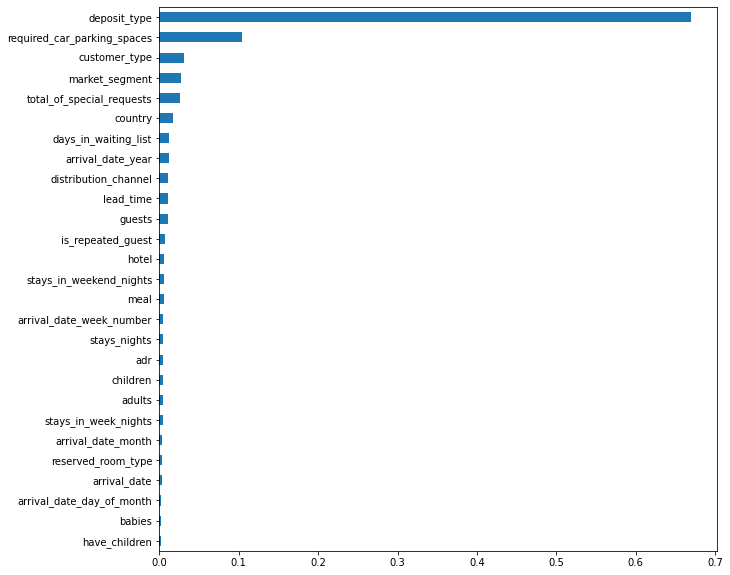

In [121]:
## feature_importances 확인
model_dt = pipe_xg. named_steps['xgbclassifier']

importances = pd. Series(model_dt. feature_importances_, features)
plt. figure(figsize= (10,10))
importances. sort_values(). plot. barh();

---
- 하이퍼파라미터 튜닝

In [122]:
## 최적 estimators 찾기

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
X_val_encoded = encoder.transform(X_val) # 검증데이터

model = XGBClassifier(n_jobs=-1, random_state=10,
                  subsample= 0.7,
                  n_estimators= 10300,  # 300
                  max_depth= 10,
                  learning_rate= 0.2,
                  colsample_bytree=0.4 ,
                  colsample_bylevel=0.3
)

eval_set = [(X_train_encoded, y_train), 
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤

## 403 에서 멈춤

[0]	validation_0-error:0.30274	validation_1-error:0.30184
[1]	validation_0-error:0.26055	validation_1-error:0.26345
[2]	validation_0-error:0.23318	validation_1-error:0.23366
[3]	validation_0-error:0.20198	validation_1-error:0.20556
[4]	validation_0-error:0.19603	validation_1-error:0.20149
[5]	validation_0-error:0.18719	validation_1-error:0.19196
[6]	validation_0-error:0.18376	validation_1-error:0.18898


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[7]	validation_0-error:0.18346	validation_1-error:0.18854
[8]	validation_0-error:0.18366	validation_1-error:0.18970
[9]	validation_0-error:0.17357	validation_1-error:0.18050
[10]	validation_0-error:0.16674	validation_1-error:0.17621
[11]	validation_0-error:0.16755	validation_1-error:0.17681
[12]	validation_0-error:0.16162	validation_1-error:0.17284
[13]	validation_0-error:0.15999	validation_1-error:0.17086
[14]	validation_0-error:0.15993	validation_1-error:0.17108
[15]	validation_0-error:0.15769	validation_1-error:0.16987
[16]	validation_0-error:0.15565	validation_1-error:0.16811
[17]	validation_0-error:0.15273	validation_1-error:0.16646
[18]	validation_0-error:0.15102	validation_1-error:0.16618
[19]	validation_0-error:0.14768	validation_1-error:0.16298
[20]	validation_0-error:0.14681	validation_1-error:0.16188
[21]	validation_0-error:0.14592	validation_1-error:0.16117
[22]	validation_0-error:0.14486	validation_1-error:0.16073
[23]	validation_0-error:0.14280	validation_1-error:0.15940


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.3,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10300, n_jobs=-1, num_parallel_tree=1,
              random_state=10, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [132]:
# 하이퍼파라미터 적용
pipe_xg = make_pipeline(
    OrdinalEncoder(),   
    SimpleImputer(),    
    XGBClassifier(n_jobs=-1, random_state=10,
                  subsample= 0.7,
                  n_estimators= 403,  # 300
                  max_depth= 5,
                  learning_rate= 0.2,
                  colsample_bytree=0.4 ,
                  colsample_bylevel=0.3 )
)   

# 예측
pipe_xg.fit(X_train, y_train)

y_pred_xg = pipe_xg.predict(X_val)

conf_xg = confusion_matrix(y_val, y_pred_xg)
clf_report_xg = classification_report(y_val, y_pred_xg)

print(f"Confusion Matrix : \n{conf_xg}")
print(f"Classification Report : \n{clf_report_xg}")

print('훈련 정확도(train_accuracy): ', pipe_xg.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_xg.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_xg))

y_pred_proba_xg = pipe_xg. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_xg))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[02:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix : 
[[10259  1049]
 [ 1603  5244]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     11308
           1       0.83      0.77      0.80      6847

    accuracy                           0.85     18155
   macro avg       0.85      0.84      0.84     18155
weighted avg       0.85      0.85      0.85     18155

훈련 정확도(train_accuracy):  0.8784995249046367
검증 정확도(val_accuracy):  0.8539245386945745
validation f1_score:  0.7981735159817351
AUC score:  0.9299446608779732


In [ ]:
# 훈련 정확도가 크게 올랏고 나머지 수치들도 많이 올랐다.

In [130]:
# test 
pipe_xg = make_pipeline(
    OrdinalEncoder(),   
    SimpleImputer(),    
    XGBClassifier(n_jobs=-1, random_state=10,
                  subsample= 0.7,
                  n_estimators= 300,  # 300
                  max_depth= 5,
                  learning_rate= 0.2,
                  colsample_bytree=0.4 ,
                  colsample_bylevel=0.3 )
)   
     

# 예측
pipe_xg.fit(X_test, y_test)
y_pred_xg = pipe_xg.predict(X_test)
clf_report_xg = classification_report(y_test, y_pred_xg)


print(f"Classification Report : \n{clf_report_xg}")
print('검증 정확도(val_accuracy): ', pipe_xg.score(X_test, y_test))
print("validation f1_score: ", f1_score(y_test, y_pred_xg))
y_pred_proba_xg = pipe_xg. predict_proba(X_test)[:, - 1]
print('AUC score: ', roc_auc_score(y_test, y_pred_proba_xg))  ## ROC 커브 면적

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[02:30:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     14135
           1       0.89      0.82      0.85      8559

    accuracy                           0.89     22694
   macro avg       0.89      0.88      0.88     22694
weighted avg       0.89      0.89      0.89     22694

검증 정확도(val_accuracy):  0.8909844011633031
validation f1_score:  0.8496962332928312
AUC score:  0.9600043857957912


In [169]:
print( '정확도(test_accuracy):   ')

정확도(test_accuracy):   


---
### 아다 부스트 (Ada Boost)

In [137]:
# 파이프 라인 사용
pipe_ad = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    AdaBoostClassifier(n_estimators=5, random_state=1)
)   

# 예측
pipe_ad.fit(X_train, y_train)

y_pred = pipe_ad.predict(X_val)

conf = confusion_matrix(y_val, y_pred)
clf_report = classification_report(y_val, y_pred)

print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

print('훈련 정확도(train_accuracy): ', pipe_ad.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_ad.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred))

y_pred_proba = pipe_ad. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

Confusion Matrix : 
[[10498   810]
 [ 3433  3414]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.93      0.83     11308
           1       0.81      0.50      0.62      6847

    accuracy                           0.77     18155
   macro avg       0.78      0.71      0.72     18155
weighted avg       0.77      0.77      0.75     18155

훈련 정확도(train_accuracy):  0.7665835823567484
검증 정확도(val_accuracy):  0.7662902781602864
validation f1_score:  0.6167464547014723
AUC score:  0.8198497101924943


AUC score:  0.8198497101924943


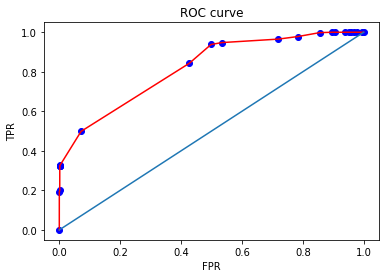

In [138]:
## ROC curve (1에 가까울 수록 학습이 잘됐다.)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
plt. scatter(fpr, tpr, color= 'blue')
plt. plot(fpr, tpr, color= 'red')
plt. plot([0,1],[0,1])
plt. title('ROC curve')
plt. xlabel('FPR')
plt. ylabel('TPR')
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))  ## ROC 커브 면적

idx: 10 , threshold: 0.46210821036087196


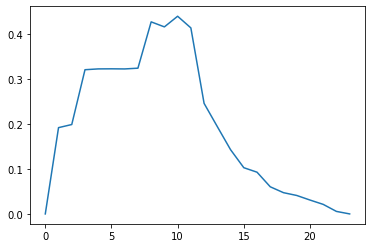

In [139]:
# 최적 threshold 
optimal_idx = np. argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('idx:', optimal_idx, ', threshold:', optimal_threshold)
plt. plot(tpr- fpr);

# 임계값이 1이면 positive를 예측을 할 수 없게 되고 0에 가까워질수록 positive라고 예측할 확률이 높아진다.

# 임계값을 아래 threshold 값으로 정했을 때가 최적

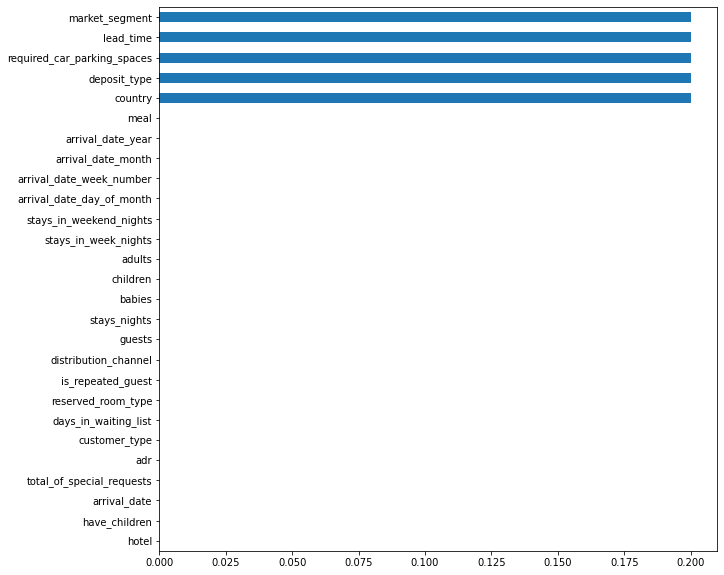

In [140]:
## feature_importances 확인
model_dt = pipe_ad. named_steps['adaboostclassifier']

importances = pd. Series(model_dt. feature_importances_, features)
plt. figure(figsize= (10,10))
importances. sort_values(). plot. barh();

In [141]:
# 하이퍼파라미터 적용
pipe_ad = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    AdaBoostClassifier(n_estimators=300, random_state=1,
                      learning_rate = 0.01)
)   

# 예측
pipe_ad.fit(X_train, y_train)

y_pred_ad = pipe_ad.predict(X_val)

conf_ad = confusion_matrix(y_val, y_pred_ad)
clf_report_ad = classification_report(y_val, y_pred_ad)

print(f"Confusion Matrix : \n{conf_ad}")
print(f"Classification Report : \n{clf_report_ad}")

print('훈련 정확도(train_accuracy): ', pipe_ad.score(X_train, y_train))
print('검증 정확도(val_accuracy): ', pipe_ad.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_ad))

y_pred_proba_ad = pipe_ad. predict_proba(X_val)[:, - 1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_ad))

Confusion Matrix : 
[[11284    24]
 [ 4614  2233]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.71      1.00      0.83     11308
           1       0.99      0.33      0.49      6847

    accuracy                           0.74     18155
   macro avg       0.85      0.66      0.66     18155
weighted avg       0.82      0.74      0.70     18155

훈련 정확도(train_accuracy):  0.7443160692399852
검증 정확도(val_accuracy):  0.7445331864500138
validation f1_score:  0.4905536028119507
AUC score:  0.8589622544277058


---
### validtaion 결과값 비교

In [153]:
print('>>>>> Logistic Regression <<<<<')
#print(f"Classification Report : \n{clf_report_lg}")
print('검증 정확도(val_accuracy): ', pipe_lg.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_lg))
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_lg))  ## ROC 커브 면적
print('-'*100)
print('>>>>> Dicsion Tree <<<<<')
#print(f"Classification Report : \n{clf_report_dt}")
print('검증 정확도(val_accuracy): ', pipe_dt.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_dt))
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_dt))
print('-'*100)
print('>>>>> Random Forest <<<<<')
print('검증 정확도(val_accuracy): ', pipe_rf.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_rf))
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_rf))
print('-'*100)
print('>>>>> XG Boost <<<<<')
#print(f"Classification Report : \n{clf_report_xg}")
print('검증 정확도(val_accuracy): ', pipe_xg.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_xg))
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_xg))  ## ROC 커브 면적
print('-'*100)
print('>>>>> Ada Boost <<<<<')
#print(f"Classification Report : \n{clf_report_ad}")
print('검증 정확도(val_accuracy): ', pipe_ad.score(X_val, y_val))
print("validation f1_score: ", f1_score(y_val, y_pred_ad))
print('AUC score: ', roc_auc_score(y_val, y_pred_proba_ad))  ## ROC 커브 면적
print('-'*100)

>>>>> Logistic Regression <<<<<
검증 정확도(val_accuracy):  0.7762599834756265
validation f1_score:  0.6348435814455231
AUC score:  0.8182716331165565
----------------------------------------------------------------------------------------------------
>>>>> Dicsion Tree <<<<<
검증 정확도(val_accuracy):  0.8400440649958689
validation f1_score:  0.7800999545661063
AUC score:  0.9147332927818602
----------------------------------------------------------------------------------------------------
>>>>> Random Forest <<<<<
검증 정확도(val_accuracy):  0.8752409804461581
validation f1_score:  0.829172637453805
AUC score:  0.9470568663633847
----------------------------------------------------------------------------------------------------
>>>>> XG Boost <<<<<
검증 정확도(val_accuracy):  0.8539245386945745
validation f1_score:  0.7981735159817351
AUC score:  0.9299446608779732
----------------------------------------------------------------------------------------------------
>>>>> Ada Boost <<<<<
검증 정확도(val_accu

test 검증 값  

---

Logistic Regression <<<<<  
검증 정확도(val_accuracy):  0.7862430598396052  
validation f1_score:  0.655199374511337  
AUC score:  0.8265338868230765  

----------------------------------------------------------------------------------------------------
Dicsion Tree <<<<<  
검증 정확도(val_accuracy):  0.8724773067771217  
validation f1_score:  0.8241584639688905  
AUC score:  0.9518606589860688  

----------------------------------------------------------------------------------------------------
Random Forest <<<<<  
검증 정확도(val_accuracy):  0.9947563232572486  
validation f1_score:  0.9930242100943785  
AUC score:  0.999427528010179  

----------------------------------------------------------------------------------------------------
XG Boost <<<<<  
검증 정확도(val_accuracy):  0.8909844011633031  
validation f1_score:  0.8496962332928312  
AUC score:  0.9600043857957912  

----------------------------------------------------------------------------------------------------
 Ada Boost <<<<<  
검증 정확도(val_accuracy):  0.7461443553362123  
validation f1_score:  0.4957549234135668  
AUC score:  0.8456414335865416 

----------------------------------------------------------------------------------------------------

1. Random Forest 
2. XG Boost
3. Dicision Tree  


테스트 진행

 - Random Forest 과적합
 - XG Boost, Dicision Tree 선택

In [173]:
#df.to_csv('C:/python/codestates/data/hotel_bookings_after.csv')

---
가상으로